1. PCA 방식과 4가지 steps을 적으시오. (참고 382p)



입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해 될 수 있고, 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬이 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 변환 차원 수만큼  고유벡터 추출
4. 고유값이 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

2. LDA와 PCA의 차이


LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾음
PCA는 입력 데이터의 변동성의 가장 큰 축을 찾음

3.  LDA 4가지 steps 적으시오



1. 클래스 내부와 클래스 간 분산 행렬을 구함. 개별 피처의 평균 벡터(mean vector)를 기반
2. 클래스 내부 분산 행렬의 전치행렬, 클래스 간 분산 행렬의 곱을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 변환 차원 수만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

 4. SVD(Singular Value Decompostion)이 PCA와 다른점

PCA는 정방행렬만을 고유벡터로 분해, SVD는 행과 열의 크기가 다른 행렬에도 적용 가능.

5. k-평균 동작 원리와 장단점




임의의 지점인 군집 중심점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법
장점 : 알고리즘이 쉽고 간결
단점 : 속성 개수 많을 수록 정확도 떨어짐, 반복 횟수가 많을 경우 수행 시간 매우 느려짐, 몇 개의 군집을 선택해야 할지 정하기 어려움

6.  PCA 연습 
- load_wine data set 이용

In [16]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
wine=load_wine()
wine_df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target']=wine.target
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


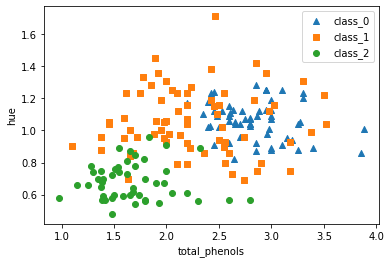

In [11]:
#class1는 세모, class2는 네모, class3는 동그라미로 표현
markers=['^', 's', 'o']

# 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_data = wine_df[wine_df['target']==i]['total_phenols']
    y_data = wine_df[wine_df['target']==i]['hue']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
plt.legend()
plt.xlabel('total_phenols')
plt.ylabel('hue')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
wine_scaled=StandardScaler().fit_transform(wine_df.iloc[:,:-1])

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca=pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


In [20]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
wine_pca_df=pd.DataFrame(wine_pca, columns=pca_columns)
wine_pca_df['target']=wine.target
wine_pca_df

,pca_component_1,pca_component_2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


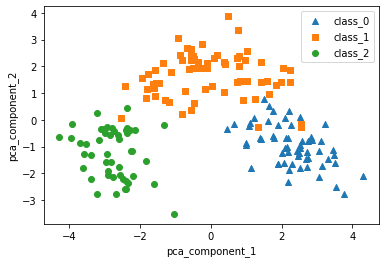

In [21]:
#class1는 세모, class2는 네모, class3는 동그라미로 표현
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_data = wine_pca_df[wine_pca_df['target']==i]['pca_component_1']
    y_data = wine_pca_df[wine_pca_df['target']==i]['pca_component_2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()


<AxesSubplot:>

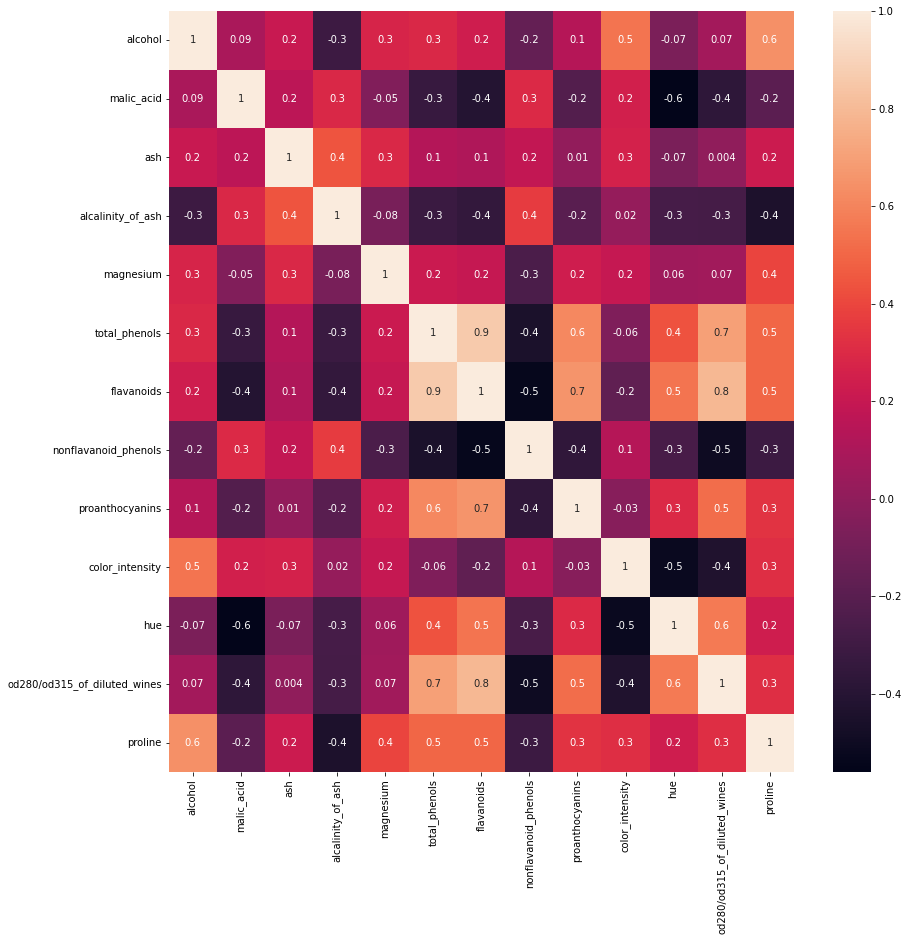

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

X_features = wine_df.drop('target', axis=1)
y_target = wine_df['target']

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

pca_X = wine_pca_df[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, y_target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ',scores)
print('원본 데이터 평균 정확도:{0:.4f}'.format(np.mean(scores)))
print('PCA 변환 데이터 교차 검증 개별 정확도: ',scores_pca)
print('PCA 변환 데이터 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

원본 데이터 교차 검증 개별 정확도:  [0.93333333 0.89830508 0.98305085]
원본 데이터 평균 정확도:0.9382
PCA 변환 데이터 교차 검증 개별 정확도:  [0.93333333 0.91525424 0.94915254]
PCA 변환 데이터 평균 정확도:0.9326


7. LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

wine = load_wine()
# 정규분포로 스케일링
wine_scaled=StandardScaler().fit_transform(wine.data)
# 2개의 주요 component로 NMF 변환
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)


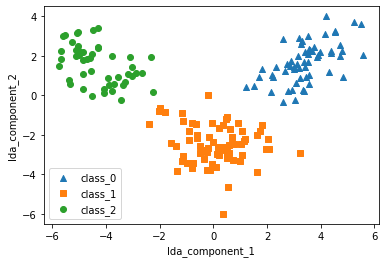

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
wineDF_lda = pd.DataFrame(wine_lda,columns=lda_columns)
wineDF_lda['target']=wine.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    X_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']
    plt.scatter(X_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

8. SVD & NMF

Text(0.5, 1.0, 'NMF Transformed')

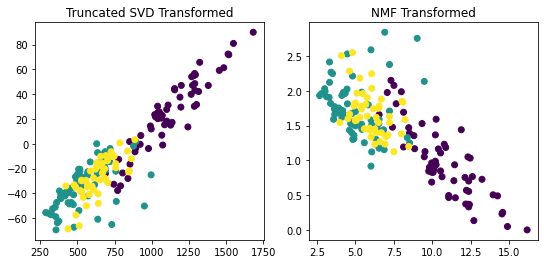

In [38]:
from sklearn.decomposition import TruncatedSVD, PCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)
# 2개의 주요 component로 NMF 변환
nmf = NMF(n_components=2)
nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(wine_tsvd[:,0], wine_tsvd[:,1], c=wine.target)
ax2.scatter(wine_nmf[:,0], wine_nmf[:,1], c=wine.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('NMF Transformed')

9. 차원 축소 비교

Text(0.5, 1.0, 'LDA Transformed')

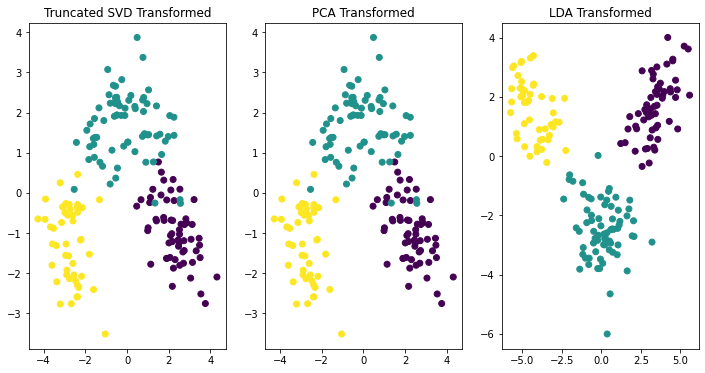

In [42]:
from sklearn.preprocessing import StandardScaler

# wine 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_scaled_tsvd = tsvd.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_scaled_pca = pca.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 LDA 변환 수행 
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_scaled_lda = lda.transform(wine_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 가운데에, LDA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,6), ncols=3)
ax1.scatter(wine_scaled_tsvd[:,0], wine_scaled_tsvd[:,1], c=wine.target)
ax2.scatter(wine_scaled_pca[:,0], wine_scaled_pca[:,1], c=wine.target)
ax3.scatter(wine_scaled_lda[:,0], wine_scaled_lda[:,1], c=wine.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
ax3.set_title('LDA Transformed')